In [28]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy.stats import kstest, ks_2samp, t, normaltest, norm, chisquare
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from distribution import Distribution
from feature_matrix import FeatureMatrix
from data_validator import DataValidator
import metrics
import logging

logging.basicConfig(
     level=logging.INFO, 
     format= '%(asctime)s : %(levelname)s : %(message)s'
     )
logger = logging.getLogger()
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
data = pd.read_csv("german_credit_data.csv").drop(columns=['Unnamed: 0'])
data['Duration'] = data['Duration'].astype(float)
data['Credit amount'] = data['Credit amount'].astype(float)
data['Age'] = data['Age'].astype(float)
data.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.0,male,2,own,NaN,little,1169.0,6.0,radio/TV,good
1,22.0,female,2,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49.0,male,1,own,little,NaN,2096.0,12.0,education,good
3,45.0,male,2,free,little,little,7882.0,42.0,furniture/equipment,good
4,53.0,male,2,free,little,little,4870.0,24.0,car,bad


In [47]:
data1, data2 = train_test_split(data, test_size=0.33, random_state=35)

In [60]:
dv = DataValidator(bins=10, log_successfull_metrics=True, log_individual_metrics=False)
dv.fit(data1)
# dv.to_pickle("test.pkl")

# dv = DataValidator.read_pickle("test.pkl")

metrics_1 = dv.transform(data2)

data2_ = data2.copy()
data2_["Credit amount"] = np.random.randint(size=len(data2_), low=data2_["Credit amount"].min(), high=data2_["Credit amount"].max())
data2_["Age"] = np.random.randint(size=len(data2_), low=data2_["Age"].min(), high=data2_["Age"].max())
metrics_2 = dv.transform(data2_)
# dv.feature_matrix.plot_attr(attr="pdf_")

2022-05-11 12:13:15,239 : WARNING : Cannot create Distribution object for Job. Bin edges must be unique: array([0., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3.]).
You can drop duplicate edges by setting the 'duplicates' kwarg
2022-05-11 12:13:15,257 : WARNING : Cannot create Distribution object for Duration. Bin edges must be unique: array([ 4.,  9., 12., 12., 15., 18., 24., 24., 30., 36., 60.]).
You can drop duplicate edges by setting the 'duplicates' kwarg
2022-05-11 12:13:15,422 : INFO : All features are as expected.
|               | chisquare_pvalue   | kstest_pvalue   | missing_val_rat_rel_diff   | normal   | psi        | rel_abs_diff_of_means   | z_score_abs   | success   |
|:--------------|:-------------------|:----------------|:---------------------------|:---------|:-----------|:------------------------|:--------------|:----------|
| Age           | (OK) 1.0           | (OK) 0.0        | (OK) 0.0                   | (OK) nan | (OK) 0.054 | (OK) 0.01               | (OK) 0.031    |

<AxesSubplot:>

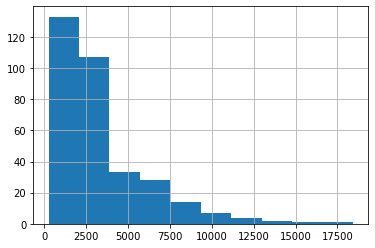

In [61]:
data2["Credit amount"].hist()

In [33]:
a = metrics_2[[col for col in metrics_2.columns if not col.endswith("_result")]].round(3)
logger.info("\n"+a.to_markdown(), extra=a.to_dict())

2022-05-11 11:23:55,426 : INFO : 
|     |   Age | Sex    |   Job | Housing   | Saving accounts   | Checking account   |   Credit amount |   Duration | Purpose             | Risk   |
|----:|------:|:-------|------:|:----------|:------------------|:-------------------|----------------:|-----------:|:--------------------|:-------|
| 832 |    29 | male   |     2 | rent      | little            | little             |           0.323 |         45 | business            | bad    |
| 617 |    37 | male   |     2 | rent      | little            | little             |           0.674 |          6 | car                 | good   |
| 638 |    34 | female |     2 | own       | little            | nan                |           0.05  |         12 | radio/TV            | good   |
| 939 |    46 | male   |     3 | own       | nan               | nan                |           0.053 |         24 | car                 | good   |
| 826 |    33 | female |     2 | rent      | little            | little       

In [34]:
c = [col for col in metrics_2.columns if not col.endswith("_result")]
for col in c:
    if col+"_result" not in metrics_2.columns: continue
    metrics_2[col] = metrics_2[col+"_result"].replace({True: "✓", False:"X"}) + " " +  metrics_2[col].round(3).astype(str)

In [35]:
metrics_2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
832,29.0,male,2,rent,little,little,0.322882,45.0,business,bad
617,37.0,male,2,rent,little,little,0.673998,6.0,car,good
638,34.0,female,2,own,little,NaN,0.050169,12.0,radio/TV,good
939,46.0,male,3,own,NaN,NaN,0.053412,24.0,car,good
826,33.0,female,2,rent,little,little,0.692097,18.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
66,29.0,female,2,own,little,NaN,0.997518,12.0,radio/TV,good
822,41.0,male,2,own,little,little,0.322776,36.0,furniture/equipment,bad
113,25.0,female,2,own,little,NaN,0.831875,36.0,car,bad
465,63.0,male,2,own,little,little,0.822682,24.0,car,good


In [36]:
(~metrics_2[[col for col in metrics_2.columns if col.endswith("_result")]]).sum(axis=1)

832    0.0
617    0.0
638    0.0
939    0.0
826    0.0
      ... 
66     0.0
822    0.0
113    0.0
465    0.0
865    0.0
Length: 330, dtype: float64

In [37]:
metrics_.join(a, rsuffix='_result')

NameError: name 'metrics_' is not defined

In [ ]:
kstest(X_test.mileage, X_train.mileage)

In [ ]:
kstest(X_test.mileage, lambda x: metrics.cdf(x, X_train.mileage, bins=100))


In [ ]:
a = np.random.normal(X_train.mileage.mean(), X_train.mileage.std(), size=len(X_train.mileage))
kstest(a, lambda x: metrics.cdf(x, X_train.mileage, bins=100))

In [ ]:
kstest(a, X_train.mileage)

In [ ]:
X_train.mileage.value_counts(bins=5, normalize=True).sort_index().cumsum()

In [ ]:
%load_ext autoreload
%autoreload 2

import metrics

In [ ]:
ref_var = X_train.engineSize
var = X_test.engineSize
print(metrics.abs_difference_of_means(ref_var, var))
print(metrics.relative_abs_difference_of_means(ref_var, var))
print(metrics.relative_wasserstein_varance(ref_var, var))
print(metrics.is_var_within_z_threshold(ref_var, var, z_threshold=1))
print(metrics.is_ks_successfull(ref_var, var))
print(metrics.is_vars_normal(ref_var, var))
print(metrics.psi(ref_var, var))


In [ ]:
X_train.describe()

In [ ]:
X_test.describe()

In [ ]:
ref_var.hist()

In [ ]:
ref_dist, ref_dist_bins = pd.cut(ref_var, 10, retbins=True)
ref_dist = ref_dist.value_counts(normalize=True)

In [ ]:
var_dist = pd.cut(var, bins=ref_dist_bins).value_counts(normalize=True)

In [ ]:
PSI=((var_dist - ref_dist) * np.log(var_dist / ref_dist)).sum()
PSI

In [ ]:
np.log(var_dist / ref_dist)

In [ ]:
ref_dist, ref_dist_bins = pd.qcut(ref_var, 4, retbins=True)
ref_dist = ref_dist.value_counts(normalize=True)

var_dist = pd.cut(var, bins=ref_dist_bins).value_counts(normalize=True)
var_dist

In [ ]:
def cdf(x, X):
    pd.qcut(ref_var, 4, retbins=True)

In [ ]:
ref_var.value_counts(bins=10, normalize=True).sort_index().cumsum().loc[2]

In [ ]:
pdf_ = ref_var.value_counts(bins=10, normalize=True).sort_index().cumsum()
a.iloc[a.index.get_loc(5)]